In [160]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Data Preprocessing
Loading dataset

In [161]:
profiles = pd.read_csv('data/profiles.csv')
animes = pd.read_csv('data/animes.csv')
reviews = pd.read_csv('data/reviews.csv')

In [162]:
# Checking the columns of the dataset
print("Profiles columns:", profiles.columns)
print("Animes columns:", animes.columns)
print("Reviews columns:", reviews.columns)

Profiles columns: Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')
Animes columns: Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')
Reviews columns: Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')


In [163]:
# Merging datasets:
try:
    merged_data = pd.merge(animes, reviews, on='uid', how='inner')
    merged_data = pd.merge(merged_data, profiles, on='profile', how='inner')

    print("Merge successful!")
    print("Merged dataset:")
    print(merged_data.head())
except KeyError as e:
    print("KeyError:", e)

Merge successful!
Merged dataset:
     uid                    title  \
0  23273  Shigatsu wa Kimi no Uso   
1  23273  Shigatsu wa Kimi no Uso   
2  23273  Shigatsu wa Kimi no Uso   
3  23273  Shigatsu wa Kimi no Uso   
4  23273  Shigatsu wa Kimi no Uso   

                                            synopsis  \
0  Music accompanies the path of the human metron...   
1  Music accompanies the path of the human metron...   
2  Music accompanies the path of the human metron...   
3  Music accompanies the path of the human metron...   
4  Music accompanies the path of the human metron...   

                                               genre  \
0  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
3  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
4  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   

                          aired  episodes  members  popularity  ranke

Cleaning the merged dataset
Checking for missing values in the merged DataFrame

In [164]:
        
rows, columns = merged_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)
print(merged_data.columns)

Number of rows: 31738
Number of columns: 22
Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score_x', 'img_url', 'link_x', 'profile',
       'anime_uid', 'text', 'score_y', 'scores', 'link_y', 'gender',
       'birthday', 'favorites_anime', 'link'],
      dtype='object')


In [165]:
missing_values = merged_data.isnull().sum()
print(missing_values)

uid                   0
title                 0
synopsis           1306
genre                 0
aired                 0
episodes            821
members               0
popularity            0
ranked             4789
score_x             661
img_url             206
link_x                0
profile               0
anime_uid             0
text                  0
score_y               0
scores                0
link_y                0
gender             5153
birthday           8038
favorites_anime       0
link                  0
dtype: int64


In [166]:
merged_data.nunique()
merged_data.info()
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31738 entries, 0 to 31737
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              31738 non-null  int64  
 1   title            31738 non-null  object 
 2   synopsis         30432 non-null  object 
 3   genre            31738 non-null  object 
 4   aired            31738 non-null  object 
 5   episodes         30917 non-null  float64
 6   members          31738 non-null  int64  
 7   popularity       31738 non-null  int64  
 8   ranked           26949 non-null  float64
 9   score_x          31077 non-null  float64
 10  img_url          31532 non-null  object 
 11  link_x           31738 non-null  object 
 12  profile          31738 non-null  object 
 13  anime_uid        31738 non-null  int64  
 14  text             31738 non-null  object 
 15  score_y          31738 non-null  int64  
 16  scores           31738 non-null  object 
 17  link_y      

In [167]:

# Converting 'birthday' column to datetime data type and handling errors
merged_data['birthday'] = pd.to_datetime(merged_data['birthday'], format='%b %d, %Y', errors='coerce')
print(merged_data['birthday'])
# By setting errors='coerce', the function will replace the problematic date strings with NaT values.



0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
31733          NaT
31734          NaT
31735          NaT
31736   1996-01-10
31737   1996-01-10
Name: birthday, Length: 31738, dtype: datetime64[ns]


In [168]:
# Calculating the age based on current date
current_date = datetime.now()
merged_data['age'] = (current_date - merged_data['birthday']) // pd.Timedelta(days=365)
print(merged_data)

         uid                                              title  \
0      23273                            Shigatsu wa Kimi no Uso   
1      23273                            Shigatsu wa Kimi no Uso   
2      23273                            Shigatsu wa Kimi no Uso   
3      23273                            Shigatsu wa Kimi no Uso   
4      23273                            Shigatsu wa Kimi no Uso   
...      ...                                                ...   
31733  35828                                   Miira no Kaikata   
31734  35828                                   Miira no Kaikata   
31735  35828                                   Miira no Kaikata   
31736  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   
31737  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   

                                                synopsis  \
0      Music accompanies the path of the human metron...   
1      Music accompanies the path of the human metron...   
2      Music ac

In [169]:
# Remove rows where age couldn't be calculated
merged_data.dropna(subset=['age'], inplace=True)  


In [170]:
#Calculating the mean age
mean_age = merged_data['age'].mean()
print("Mean Age:", mean_age)

Mean Age: 34.972325048475234


In [171]:
# Filling the missing values in the 'age' column with the mean age
merged_data['age'].fillna(mean_age, inplace=True)
print(merged_data)

         uid                                              title  \
16     34599                                      Made in Abyss   
17     34599                                      Made in Abyss   
18     34599                                      Made in Abyss   
19     34599                                      Made in Abyss   
20     32762                                            Circles   
...      ...                                                ...   
31727  24625                          Gundam Build Fighters Try   
31728  24625                          Gundam Build Fighters Try   
31731  10075                                        Naruto x UT   
31736  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   
31737  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   

                                                synopsis  \
16     The Abyss—a gaping chasm stretching down into ...   
17     The Abyss—a gaping chasm stretching down into ...   
18     The Abys

In [172]:
# Checking for and handling any outliers or unrealistic age values if necessary
# Example: Assuming ages above 100 or below 10 are unrealistic for your dataset
merged_data = merged_data[(merged_data['age'] <= 100) & (merged_data['age'] >= 10)]

In [173]:
# Droping unnecessary columns from merged_data
columns_to_drop = ['favorites_anime', 'link',  'score_y', 'score_x',
                   'title', 'synopsis', 'aired', 'episodes', 'members',  
                   'popularity', 'ranked', 'score', 'img_url', 
                   'text', 'score', 'scores',  'link_y', 'link_x', 
                   'uid', 'anime_uid', 'profile' , 'birthday'
                  ]

merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore') 
print(merged_data.head())

                                                genre  gender   age
16  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
17  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
18  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
19  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
20                                          ['Music']  Female  27.0


In [174]:
# Calculating the mode of gender
mode_gender = merged_data['gender'].mode()[0]
print(mode_gender)

Male


In [175]:

# Filling missing values in the 'gender' columnn with mode gender
merged_data['gender'].fillna(mode_gender, inplace=True)
merged_data.describe()

,age
count,17006.000000
mean,34.992767
std,6.977041
min,11.000000
25%,31.000000
50%,34.000000
75%,37.000000
max,94.000000


In [176]:
print(merged_data)

                                                   genre  gender   age
16     ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
17     ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
18     ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
19     ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...  Female  27.0
20                                             ['Music']  Female  27.0
...                                                  ...     ...   ...
31727                      ['Action', 'Sci-Fi', 'Mecha']  Female  34.0
31728                      ['Action', 'Sci-Fi', 'Mecha']  Female  34.0
31731  ['Action', 'Comedy', 'Super Power', 'Martial A...    Male  32.0
31736  ['Comedy', 'Drama', 'Romance', 'School', 'Slic...  Female  28.0
31737  ['Comedy', 'Drama', 'Romance', 'School', 'Slic...  Female  28.0

[17006 rows x 3 columns]


In [177]:
# Replace inconsistent/ duplicate genre values
merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()
print(merged_data.columns)

Index(['genre', 'gender', 'age'], dtype='object')


In [178]:
# Droping unnecessary columns from merged_data
columns_to_drop = ['favorites_anime', 'link',  'score_y', 'score_x',
                   'title', 'synopsis', 'aired', 'episodes', 'members',  
                   'popularity', 'ranked', 'score', 'img_url', 
                   'text', 'score', 'scores',  'link_y', 'link_x', 
                   'uid', 'anime_uid', 'profile' , 'birthday'
                  ]

merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore') 
print(merged_data.head())

                                           genre  gender   age
16  [Sci-Fi, Adventure, Mystery, Drama, Fantasy]  Female  27.0
17  [Sci-Fi, Adventure, Mystery, Drama, Fantasy]  Female  27.0
18  [Sci-Fi, Adventure, Mystery, Drama, Fantasy]  Female  27.0
19  [Sci-Fi, Adventure, Mystery, Drama, Fantasy]  Female  27.0
20                                       [Music]  Female  27.0


In [179]:
# Spliting genres into individual columns
# Assuming the 'genre' column in `merged_data` contains genres separated by commas
genre_dummies = merged_data['genre'].str.get_dummies(sep=',')
merged_df = pd.concat([merged_data, genre_dummies], axis=1)


In [180]:
# Converting column names to lowercase
genre_dummies.columns = genre_dummies.columns.str.lower()

In [181]:

# Cleaning whitespaces in genres
genre_dummies.columns = genre_dummies.columns.str.strip()

# Removing brackets and single quotes from column names
genre_dummies.columns = genre_dummies.columns.str.strip("[]'")


In [182]:
# Removing duplicate columns
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.duplicated()]

In [183]:
#Checking the unique genre column names
unique_genres = genre_dummies.columns.unique()
print(unique_genres)

Index(['adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi',
       'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei',
       'kids', 'magic', 'martial arts', 'mecha', 'military', 'music',
       'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai',
       'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen',
       'shounen ai', 'slice of life', 'space', 'sports', 'super power',
       'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri', 'action', ''],
      dtype='object')


In [184]:

# Summing columns with duplicate names
genre_dummies = genre_dummies.groupby(level=0, axis=1).sum()
print(genre_dummies)

          action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
16     0       0          1     0       0         0       0      1      0   
17     0       0          1     0       0         0       0      1      0   
18     0       0          1     0       0         0       0      1      0   
19     0       0          1     0       0         0       0      1      0   
20     0       0          0     0       0         0       0      0      0   
...   ..     ...        ...   ...     ...       ...     ...    ...    ...   
31727  0       1          0     0       0         0       0      0      0   
31728  0       1          0     0       0         0       0      0      0   
31731  0       1          0     0       1         0       0      0      0   
31736  0       0          0     0       0         0       0      1      0   
31737  0       0          0     0       0         0       0      1      0   

       fantasy  ...  shounen ai  slice of life  space  sports  super power 

In [185]:
# Sorting columns alphabetically
genre_dummies = genre_dummies.reindex(sorted(genre_dummies.columns), axis=1)



In [186]:

# Removing unwanted characters from the column names
genre_dummies.columns = genre_dummies.columns.str.replace('[\[\]]', '', regex=True)

# Fixing any potential duplicates due to this cleanup (e.g., "adventure " and "adventure")
genre_dummies = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()


In [187]:
# Droping any unnamed or empty columns if they exist
genre_dummies= genre_dummies.loc[:, ~genre_dummies.columns.str.contains('^Unnamed')]
# Removing columns with empty names
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.str.match('^$')]  


In [188]:

# Displaying the cleaned genre_dummies DataFrame
print(genre_dummies)
print(genre_dummies.columns)

       action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
16          0          1     0       0         0       0      1      0   
17          0          1     0       0         0       0      1      0   
18          0          1     0       0         0       0      1      0   
19          0          1     0       0         0       0      1      0   
20          0          0     0       0         0       0      0      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
31727       1          0     0       0         0       0      0      0   
31728       1          0     0       0         0       0      0      0   
31731       1          0     0       1         0       0      0      0   
31736       0          0     0       0         0       0      1      0   
31737       0          0     0       0         0       0      1      0   

       fantasy  game  ...  shounen ai  slice of life  space  sports  \
16           0     0  ...           0   

In [189]:
# Extracting age column from merged_data
age_column = merged_data['age']
print(age_column)

16       27.0
17       27.0
18       27.0
19       27.0
20       27.0
         ... 
31727    34.0
31728    34.0
31731    32.0
31736    28.0
31737    28.0
Name: age, Length: 17006, dtype: float64


In [190]:

# Concatenating genre_dummies and age_column along the columns axis (axis=1)
df = pd.concat([ age_column, genre_dummies], axis=1)
print(df)


        age  action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
16     27.0       0          1     0       0         0       0      1      0   
17     27.0       0          1     0       0         0       0      1      0   
18     27.0       0          1     0       0         0       0      1      0   
19     27.0       0          1     0       0         0       0      1      0   
20     27.0       0          0     0       0         0       0      0      0   
...     ...     ...        ...   ...     ...       ...     ...    ...    ...   
31727  34.0       1          0     0       0         0       0      0      0   
31728  34.0       1          0     0       0         0       0      0      0   
31731  32.0       1          0     0       1         0       0      0      0   
31736  28.0       0          0     0       0         0       0      1      0   
31737  28.0       0          0     0       0         0       0      1      0   

       fantasy  ...  shounen ai  slice 

In [191]:
# Checking for missing values
print(df.isnull().sum())

age              0
action           0
adventure        0
cars             0
comedy           0
dementia         0
demons           0
drama            0
ecchi            0
fantasy          0
game             0
harem            0
hentai           0
historical       0
horror           0
josei            0
kids             0
magic            0
martial arts     0
mecha            0
military         0
music            0
mystery          0
parody           0
police           0
psychological    0
romance          0
samurai          0
school           0
sci-fi           0
seinen           0
shoujo           0
shoujo ai        0
shounen          0
shounen ai       0
slice of life    0
space            0
sports           0
super power      0
supernatural     0
thriller         0
vampire          0
yaoi             0
yuri             0
dtype: int64


In [192]:
print(df.head())

     age  action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
16  27.0       0          1     0       0         0       0      1      0   
17  27.0       0          1     0       0         0       0      1      0   
18  27.0       0          1     0       0         0       0      1      0   
19  27.0       0          1     0       0         0       0      1      0   
20  27.0       0          0     0       0         0       0      0      0   

    fantasy  ...  shounen ai  slice of life  space  sports  super power  \
16        0  ...           0              0      0       0            0   
17        0  ...           0              0      0       0            0   
18        0  ...           0              0      0       0            0   
19        0  ...           0              0      0       0            0   
20        0  ...           0              0      0       0            0   

    supernatural  thriller  vampire  yaoi  yuri  
16             0         0        0 

In [193]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 17006 entries, 16 to 31737
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            17006 non-null  float64
 1   action         17006 non-null  int64  
 2   adventure      17006 non-null  int64  
 3   cars           17006 non-null  int64  
 4   comedy         17006 non-null  int64  
 5   dementia       17006 non-null  int64  
 6   demons         17006 non-null  int64  
 7   drama          17006 non-null  int64  
 8   ecchi          17006 non-null  int64  
 9   fantasy        17006 non-null  int64  
 10  game           17006 non-null  int64  
 11  harem          17006 non-null  int64  
 12  hentai         17006 non-null  int64  
 13  historical     17006 non-null  int64  
 14  horror         17006 non-null  int64  
 15  josei          17006 non-null  int64  
 16  kids           17006 non-null  int64  
 17  magic          17006 non-null  int64  
 18  martial ar

Data Visualization

 Visualization 1: Genre Popularity
This visualization shows which genres are most popular across all ages.

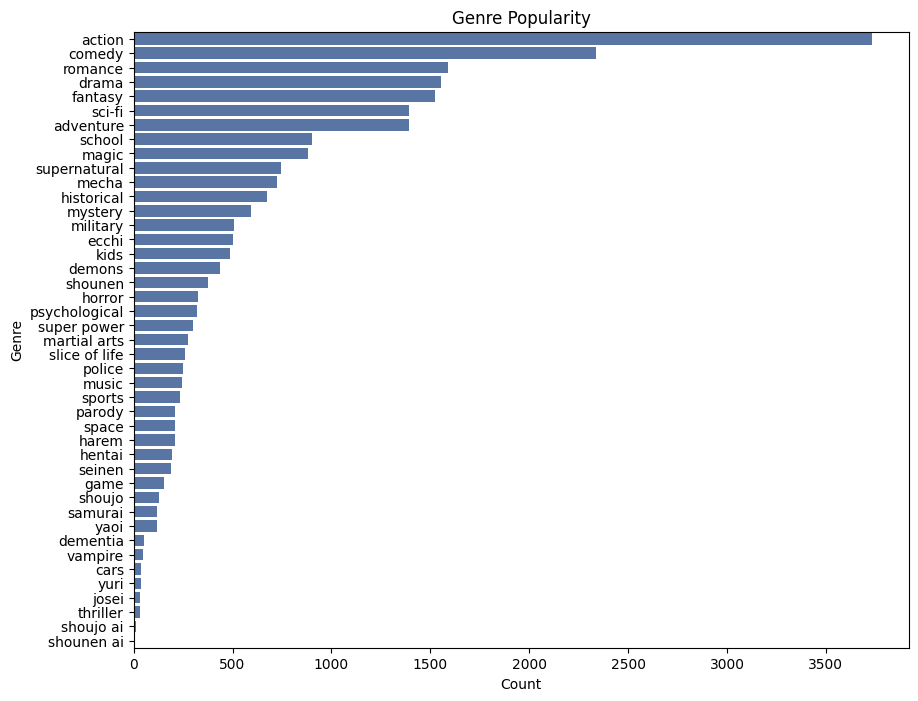

In [194]:
genre_popularity = df.drop('age', axis=1).sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Genre Popularity')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


 Visualization 2: Average Age per Genre
 This visualization helps to understand if certain genres appeal more to different age groups.



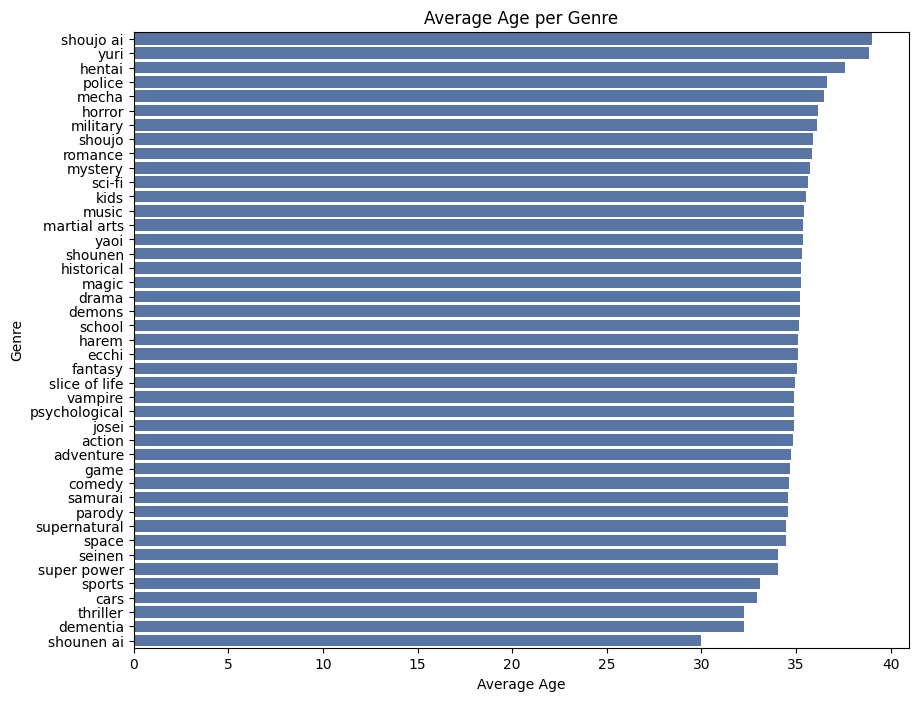

In [195]:
# Create a list of genre columns
genres = df.columns.drop('age')

# Calculate average age for each genre
avg_age_per_genre = {genre: df[df[genre] == 1]['age'].mean() for genre in genres}

# Convert to Series for easy plotting
avg_age_series = pd.Series(avg_age_per_genre).sort_values(ascending=False)

# Plot
sns.set_palette("deep")
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_age_series.values, y=avg_age_series.index)
plt.title('Average Age per Genre')
plt.xlabel('Average Age')
plt.ylabel('Genre')
plt.show()


Visualization 3: Age Distribution
Understanding the age distribution of your dataset can provide insights into the overall demographic.

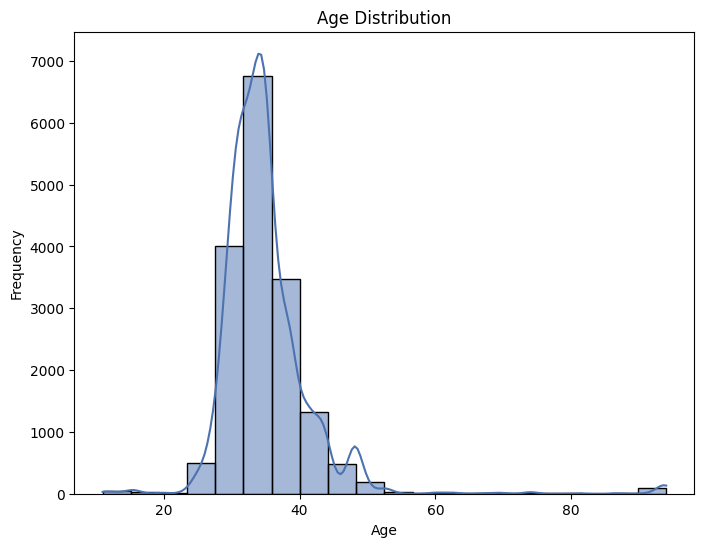

In [196]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [197]:
# # Calculate the correlation matrix
# corr = df.drop('age', axis=1).corr()

# # Plot
# plt.figure(figsize=(20, 20))
# sns.heatmap(corr, cmap="coolwarm", annot=False)
# plt.title('Genre Correlation Heatmap')
# plt.show()


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
# Preparing the data
X = df.drop('age', axis=1)  # Independent variables: genres
y = df['age']  # Dependent variable: age
X
y

16       27.0
17       27.0
18       27.0
19       27.0
20       27.0
         ... 
31727    34.0
31728    34.0
31731    32.0
31736    28.0
31737    28.0
Name: age, Length: 17006, dtype: float64

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [201]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [202]:

mse = mean_squared_error(y_test, y_pred)
mse

44.698937697613644

In [203]:
# r2 = r2_score(y_test, y_pred)
# r2